In [147]:
import pandas as pd 

df = pd.read_csv('/Users/rohith/Documents/Datasets/Iris_dataset/Iris.csv')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
6      7            4.6           3.4            1.4           0.3   
7      8            5.0           3.4            1.5           0.2   
8      9            4.4           2.9            1.4           0.2   
9     10            4.9           3.1            1.5           0.1   
10    11            5.4           3.7            1.5           0.2   
11    12            4.8           3.4            1.6           0.2   
12    13            4.8           3.0            1.4           0.1   
13    14            

In [148]:
target = df['Species']
df = df.drop(['Species','Id'],axis=1)

In [149]:
df = df.drop(['SepalWidthCm','PetalWidthCm'],axis=1)
print(df)

     SepalLengthCm  PetalLengthCm
0              5.1            1.4
1              4.9            1.4
2              4.7            1.3
3              4.6            1.5
4              5.0            1.4
5              5.4            1.7
6              4.6            1.4
7              5.0            1.5
8              4.4            1.4
9              4.9            1.5
10             5.4            1.5
11             4.8            1.6
12             4.8            1.4
13             4.3            1.1
14             5.8            1.2
15             5.7            1.5
16             5.4            1.3
17             5.1            1.4
18             5.7            1.7
19             5.1            1.5
20             5.4            1.7
21             5.1            1.5
22             4.6            1.0
23             5.1            1.7
24             4.8            1.9
25             5.0            1.6
26             5.0            1.6
27             5.2            1.5
28            

In [150]:
import numpy as np 

X = df.values.tolist()
Y = []
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(0)
    elif(val == 'Iris-virginica'):
        Y.append(2)
    else:
        Y.append(1)
        
X = np.array(X)
Y = np.array(Y)

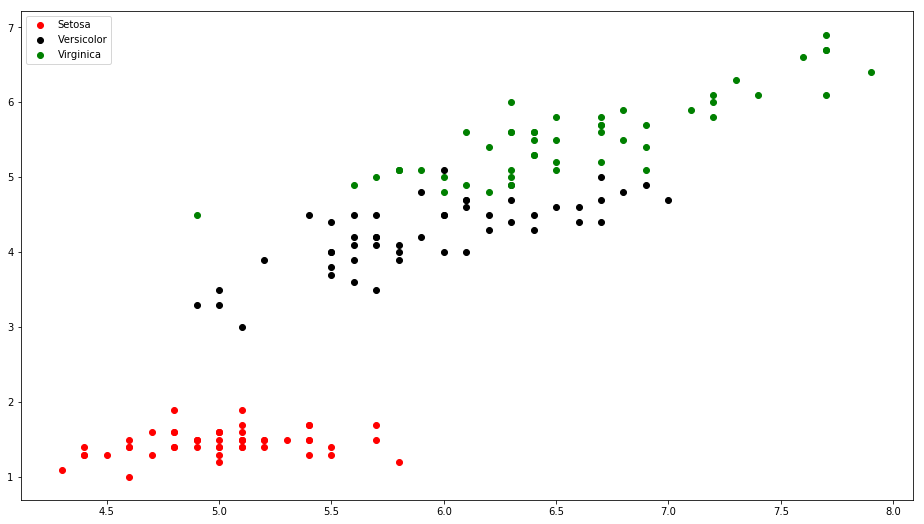

In [151]:
import matplotlib.pyplot as plt 

points_1 = df[0:50].values.tolist()
points_2 = df[50:100].values.tolist()
points_3 = df[100:].values.tolist()

points_1 = np.array(points_1)
points_2 = np.array(points_2)
points_3 = np.array(points_3)

plt.figure(figsize=(16,9))
plt.scatter(points_1[:,0],points_1[:,1],color='red',label='Setosa')
plt.scatter(points_2[:,0],points_2[:,1],color='black',label='Versicolor')
plt.scatter(points_3[:,0],points_3[:,1],color='green',label='Virginica')
plt.legend()
plt.show()

In [152]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.9)

In [153]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = []
for n in range(1,21):
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred))

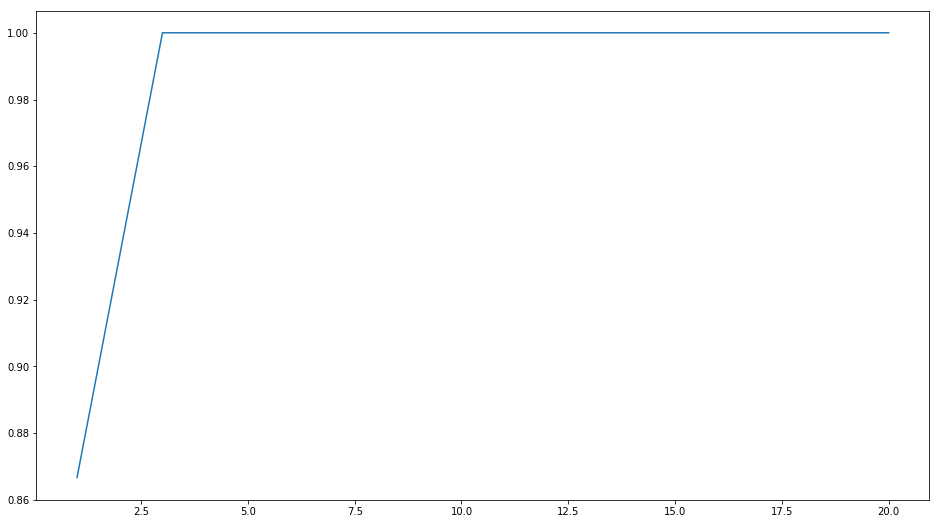

In [155]:
plt.figure(figsize=(16,9))
plt.plot(range(1,21),accuracy)

In [157]:
## K Nearest Neighbors 

y_pred_knn = []

for val in x_test:
    euc_dis = []
    ## Finding eucledian distance 
    for point in x_train:
        euc_dis.append(((val[0]-point[0])**2+(val[1]-point[1])**2)**0.5)
    temp_target = y_train.tolist()
    ## Bubble Sort 
    for i in range(len(euc_dis)):
        for j in range(0,len(euc_dis)-i-1):
            if(euc_dis[j+1] < euc_dis[j]):
                euc_dis[j], euc_dis[j+1] = euc_dis[j+1], euc_dis[j]
                temp_target[j], temp_target[j+1] = temp_target[j+1], temp_target[j]
    ## Finding majority of the neighbors 
    vote = [0,0,0]
    for i in range(3):
        vote[temp_target[i]] += 1
    y_pred_knn.append(vote.index(max(vote)))

In [160]:
print(accuracy_score(y_test,y_pred_knn))

1.0
